In [1]:
import numpy as np

In [4]:
class BernoulliTSAgent:
    def __init__(self, num_arms):
        self.num_arms = num_arms
        self.counts = [0] * num_arms
        self.wins = [0.0] * num_arms

    def get_arm(self):
        beta = lambda n, a: np.random.beta(a + 1, n - a + 1)
        result = [beta(n, a) for n, a in zip(self.counts, self.wins)]
        arm = result.index(max(result))
        return arm
    
    def sample(self, arm, reward):
        self.counts[arm] += 1
        self.wins[arm] += reward


In [ ]:
# T 번의 스텝을 N 번 시뮬레이션해서 결과 평가

N_ARMS = 4

class Env:
    def __init__(self):
        self.thetas = [0.1, 0.1, 0.2, 0.3]

    def react(self, arm):
        return 1 if np.random.rand() < self.thetas[arm] else 0
    
    def opt(self):
        return np.argmax(self.thetas)
    
def sim(Agent, env, N=1000, T=1000, c=0.1):
    selected_arms = [[0 for _ in range(T)] for _ in range(N)]
    earned_rewards = [[0 for _ in range(T)] for _ in range(N)]
    for n in range(N):
        agent = Agent(N_ARMS)
        for t in range(T):
            arm = agent.get_arm()
            reward = env.react(arm)
            agent.sample(arm, reward)
            selected_arms[n][t] = arm
            earned_rewards[n][t] = reward
    return np.array(selected_arms), np.array(earned_rewards)

In [7]:
env = Env()
arms1, rewards1 = sim(BernoulliTSAgent, env, 1000, 1000, 0.05)

In [9]:
import matplotlib.pyplot as plt

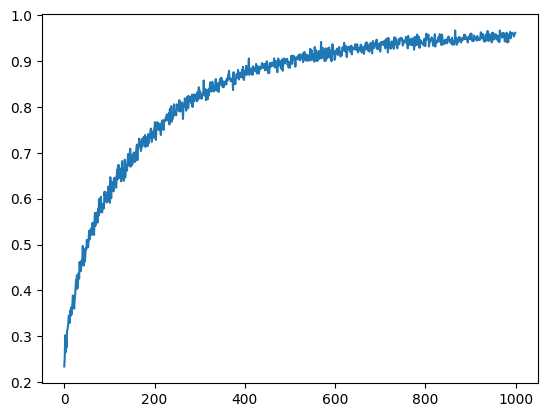

In [ ]:
plt.plot(np.mean(arms1 == env.opt(), axis=0));

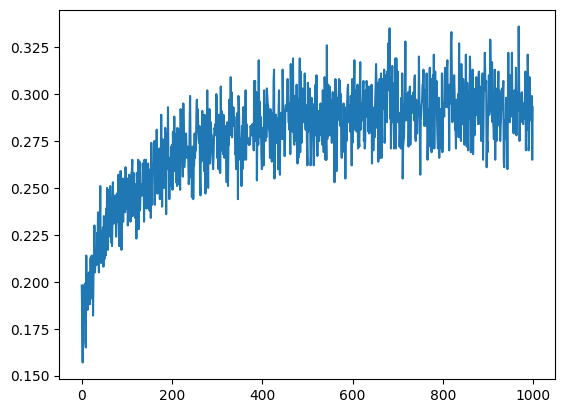

In [17]:
plt.plot(np.mean(rewards1, axis=0));